<a href="https://colab.research.google.com/github/NakulSK221B/Predidtion_of-_CIFAR10/blob/main/CIFAR10_Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 5s 0us/step


(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:

  y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
y_test = y_test.reshape(-1,)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

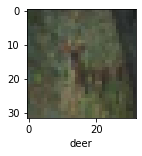

In [ ]:
plot_sample(X_train, y_train, 10)

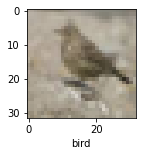

In [ ]:
plot_sample(X_train, y_train, 120)

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 120s 76ms/step - loss: 1.8118 - accuracy: 0.3534
Epoch 2/5
1563/1563 [==============================] - 117s 75ms/step - loss: 1.6234 - accuracy: 0.4273
Epoch 3/5
1563/1563 [==============================] - 116s 74ms/step - loss: 1.5412 - accuracy: 0.4548
Epoch 4/5
1563/1563 [==============================] - 119s 76ms/step - loss: 1.4837 - accuracy: 0.4766
Epoch 5/5
1563/1563 [==============================] - 116s 74ms/step - loss: 1.4340 - accuracy: 0.4948


In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 9s 30ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.54      0.60      0.57      1000
           1       0.56      0.64      0.60      1000
           2       0.35      0.47      0.40      1000
           3       0.31      0.46      0.37      1000
           4       0.57      0.19      0.28      1000
           5       0.40      0.35      0.37      1000
           6       0.61      0.38      0.47      1000
           7       0.45      0.65      0.53      1000
           8       0.78      0.37      0.50      1000
           9       0.51      0.58      0.54      1000

    accuracy                           0.47     10000
   macro avg       0.51      0.47      0.46     10000
weighted avg       0.51      0.47      0.46     10000



In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 71s 45ms/step - loss: 1.4605 - accuracy: 0.4760
Epoch 2/10
1563/1563 [==============================] - 70s 45ms/step - loss: 1.0934 - accuracy: 0.6165
Epoch 3/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.9618 - accuracy: 0.6651
Epoch 4/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.8801 - accuracy: 0.6935
Epoch 5/10
1563/1563 [==============================] - 71s 46ms/step - loss: 0.8136 - accuracy: 0.7162
Epoch 6/10
1563/1563 [==============================] - 90s 58ms/step - loss: 0.7619 - accuracy: 0.7366
Epoch 7/10
1563/1563 [==============================] - 71s 46ms/step - loss: 0.7171 - accuracy: 0.7495
Epoch 8/10
1563/1563 [==============================] - 71s 46ms/step - loss: 0.6793 - accuracy: 0.7623
Epoch 9/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.6374 - accuracy: 0.7781
Epoch 10/10
1563/1563 [==============================] - 71s 45m

In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 5s 15ms/step - loss: 0.9446 - accuracy: 0.6834


[0.9445937275886536, 0.6833999752998352]

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 4s 14ms/step


array([[6.69456786e-04, 1.22184269e-04, 2.27432279e-03, 7.01754391e-01,
        1.75677589e-04, 2.19584070e-02, 2.34749212e-04, 6.69416273e-04,
        2.71951705e-01, 1.89750339e-04],
       [2.49693077e-02, 8.65680575e-01, 1.15538762e-06, 7.93247580e-07,
        6.33175034e-07, 1.44403813e-07, 4.25672297e-08, 2.88666541e-07,
        7.23184198e-02, 3.70288044e-02],
       [1.04727454e-01, 5.62390924e-01, 2.69241602e-04, 2.00270349e-03,
        2.97869585e-04, 1.76386646e-04, 1.56062506e-05, 1.14660766e-02,
        1.46769807e-01, 1.71883956e-01],
       [5.87943614e-01, 2.52436963e-03, 1.06501265e-03, 4.98833251e-04,
        1.95109833e-03, 4.35759866e-05, 7.27063743e-05, 1.58130024e-05,
        4.05780345e-01, 1.04487423e-04],
       [6.03593389e-06, 4.20096156e-04, 8.20229575e-02, 1.28564257e-02,
        7.67142296e-01, 4.59041272e-04, 1.37050390e-01, 1.60792697e-05,
        4.85631290e-06, 2.18276145e-05]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 1, 1, 0, 4]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

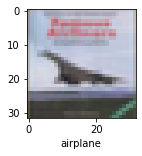

In [ ]:
plot_sample(X_test, y_test,3)

In [ ]:
classes[y_classes[3]]

'airplane'

By Nakul Sharathkumar